C:\Users\Aditya Pratap Singh\AppData\Local\Temp\ipykernel_14264\2846326980.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Project_Type'] = data['Project_Type'].replace(proj_mapping)


      Project_ID  Project_Type Location  Area_Impacted  Air_Emissions  \
0  Project_65003             3   City_A          59.76         947.08   
1  Project_71502             3   City_A          51.09         504.75   
2  Project_71403             3   City_D          67.99         955.73   
3  Project_24430             3   City_D          83.06         988.77   
4  Project_71373             3   City_B          68.02         553.13   

   Water_Pollution  Habitat_Loss  Carbon_Footprint Mitigation_Plan  \
0            81.07          9.96           8851.23         Planned   
1            66.14          8.19           8827.55         Planned   
2            54.58          5.72           8044.85     Implemented   
3            94.61          4.42           7991.42  Not Applicable   
4            47.12          5.26           8453.25  Not Applicable   

   Impact_Score   Budget  Duration  \
0         26.82  4297174        56   
1         93.53  1646897        16   
2         50.34  3297803  

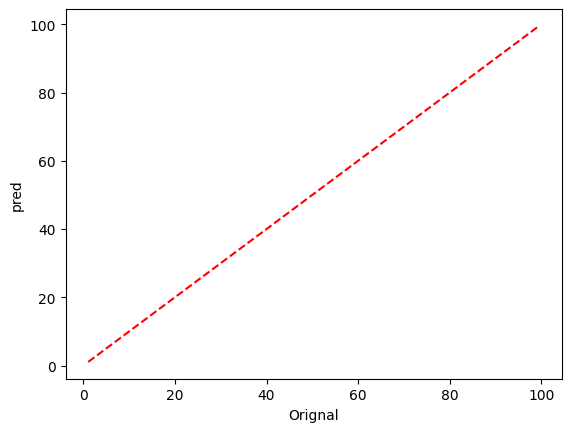

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('clean.csv')
proj_mapping = {
    'Urban Development' : 1,
    'Energy' : 2,
    'Construction' : 3,
    'Transportation' : 4,
    'Water Management' : 5
}

data['Project_Type'] = data['Project_Type'].replace(proj_mapping)
print(data.head())

features = ['Project_Type','Area_Impacted','Air_Emissions','Water_Pollution','Habitat_Loss','Carbon_Footprint']

x = data[features]
y = data.Impact_Score
print(x.head())

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

model = RandomForestRegressor(max_depth =10, random_state=10, max_leaf_nodes = 8)
model.fit(train_x, train_y)

prediction = model.predict(val_x)
print(mean_absolute_error(val_y, prediction))
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red', linestyle='--')
plt.xlabel('Orignal')
plt.ylabel('pred')
plt.plot()
print(prediction[:5])
print(data['Impact_Score'].head())

# Make predictions on the validation set
prediction = model.predict(val_x)

# Calculate mean squared error (already included)
mse = mean_squared_error(val_y, prediction)
print("Mean Squared Error:", mse)

# Calculate R-squared (accuracy)
accuracy = r2_score(val_y, prediction)
print("R-squared (Accuracy):", accuracy)